In [15]:
# Sincronizamos Google Colab con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Cargamos todas las imagenes



XML Path: /content/drive/My Drive/TFM/annotations.xml


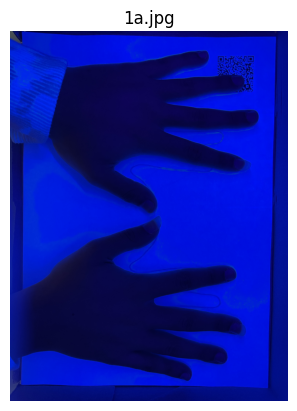

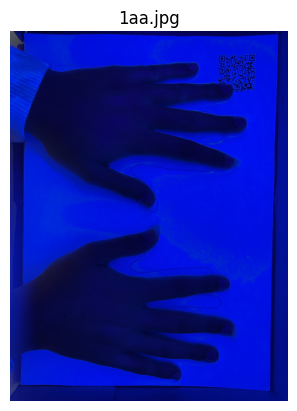

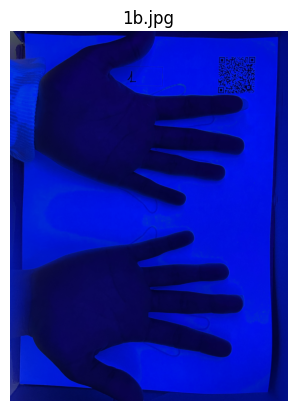

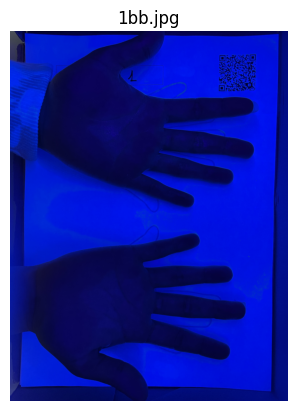

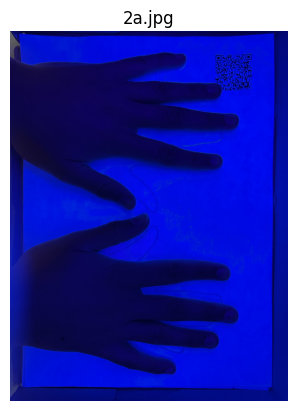

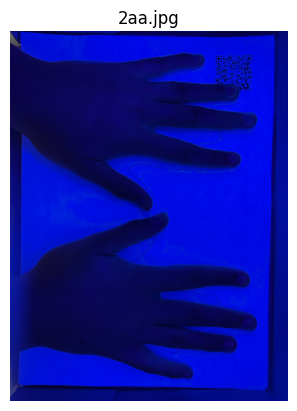

KeyboardInterrupt: 

In [17]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import cv2
import os

# Cargar y parsear el XML
xml_path = os.path.join('/content/drive/My Drive/TFM/annotations.xml')
tree = ET.parse(xml_path)

root = tree.getroot()

# Iterar sobre todas las imágenes en el XML
for image_element in root.findall('image'):
    image_name = image_element.attrib['name']  # Nombre de la imagen

    # Cargar la imagen
    image_path = os.path.join('/content/drive/My Drive/TFM/images', image_name)
    image = cv2.imread(image_path)

    if image is not None:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para matplotlib

        # Mostrar la imagen
        plt.imshow(image_rgb)
        plt.title(image_name)
        plt.axis('off')  # Sin ejes
        plt.show()
    else:
        print(f"Error al cargar la imagen: {image_name}")


# Mostramos las 5 primeras


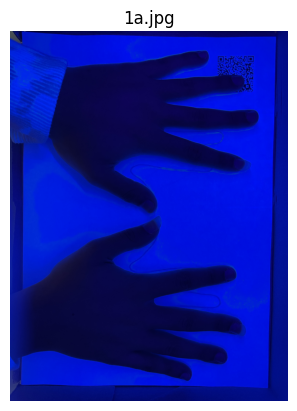

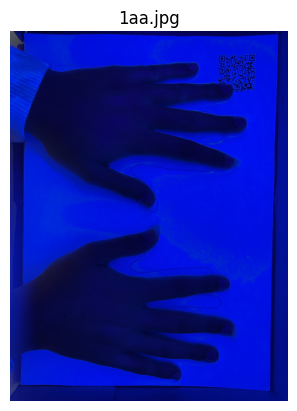

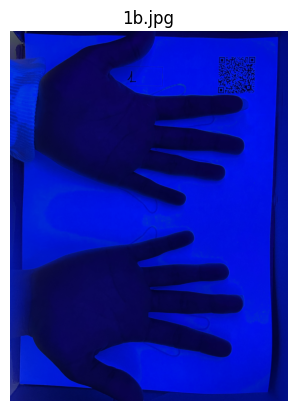

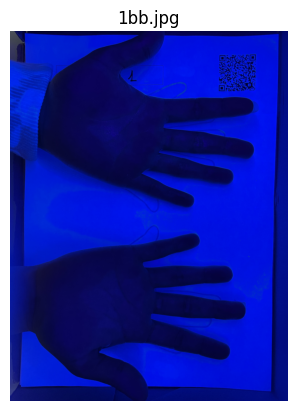

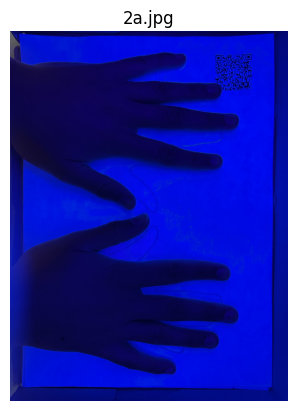

In [20]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import cv2

# Cargar y parsear el XML
xml_path = os.path.join('/content/drive/My Drive/TFM/annotations.xml')
tree = ET.parse(xml_path)
root = tree.getroot()

# Mostrar solo las primeras 5 imágenes
for i, image_element in enumerate(root.findall('image')):
    if i >= 5:
        break  # Salir del bucle después de 5 imágenes

    image_name = image_element.attrib['name']  # Nombre de la imagen
    image_path = os.path.join('/content/drive/My Drive/TFM/images', image_name)  # Ajusta la ruta si es necesario

    # Cargar la imagen
    image = cv2.imread(image_path)

    if image is not None:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Mostrar la imagen
        plt.imshow(image_rgb)
        plt.title(image_name)
        plt.axis('off')
        plt.show()
    else:
        print(f"No se pudo cargar la imagen: {image_name}")


# Vemos las etiquetas

In [21]:
import xml.etree.ElementTree as ET

# Ruta al archivo XML
xml_path = os.path.join('/content/drive/My Drive/TFM/annotations.xml')

# Parsear el XML
tree = ET.parse(xml_path)
root = tree.getroot()

# Usamos un conjunto para evitar etiquetas duplicadas
etiquetas = set()

# Recorremos todas las imágenes
for image in root.findall('image'):
    for tag_type in ['box', 'polygon', 'polyline']:
        for element in image.findall(tag_type):
            label = element.attrib.get('label')
            if label:
                etiquetas.add(label)

# Mostrar etiquetas ordenadas alfabéticamente
print("Etiquetas encontradas:")
for etiqueta in sorted(etiquetas):
    print("-", etiqueta)


Etiquetas encontradas:
- mano
- suciedad


## Observamos las imágenes mediante etiquetas

In [ ]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Cargar y parsear el XML
xml_path = os.path.join('/content/drive/My Drive/TFM/annotations.xml')
tree = ET.parse(xml_path)  # ajusta si tu archivo tiene otro nombre
root = tree.getroot()

# Tomar solo la primera imagen
image_element = root.find('image')
image_name = image_element.attrib['name']
image_path = f'images/{image_name}'

# Cargar imagen
image = cv2.imread(image_path)
if image is None:
    print(f"No se pudo cargar la imagen: {image_name}")
else:
    # Convertir a RGB para matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Dibujar cada polígono en la imagen
    for polygon in image_element.findall('polygon'):
        points_str = polygon.attrib['points']
        # Convertir la cadena de puntos a una lista de tuplas
        points = np.array([[float(x), float(y)] for x, y in
                           [point.split(',') for point in points_str.split(';')]], dtype=np.int32)
        cv2.polylines(image_rgb, [points], isClosed=True, color=(255, 0, 0), thickness=2)

    # Mostrar imagen
    plt.imshow(image_rgb)
    plt.title(image_name)
    plt.axis('off')
    plt.show()


No se pudo cargar la imagen: 1a.jpg


No sale porque solo muestra los poligonos y no las cajas en este caso no hay poligonos

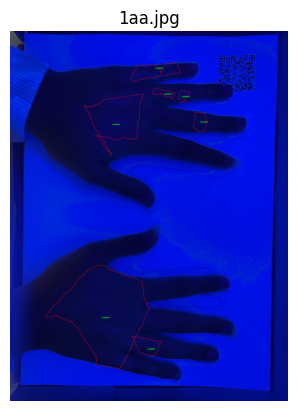

In [23]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Cargar y parsear el XML
xml_path = os.path.join('/content/drive/My Drive/TFM/annotations.xml')
tree = ET.parse(xml_path)  # Asegúrate de que este sea tu archivo
root = tree.getroot()

# Obtener la segunda imagen (índice 1)
image_elements = root.findall('image')
if len(image_elements) < 2:
    print("No hay una segunda imagen en el XML.")
else:
    image_element = image_elements[1]
    image_name = image_element.attrib['name']
    image_path = os.path.join('/content/drive/My Drive/TFM/images', image_name)  # Ajusta según tu carpeta

    # Cargar imagen
    image = cv2.imread(image_path)
    if image is None:
        print(f"No se pudo cargar la imagen: {image_name}")
    else:
        # Convertir a RGB para matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Dibujar polígonos y etiquetas
        for polygon in image_element.findall('polygon'):
            points_str = polygon.attrib['points']
            label = polygon.attrib.get('label', 'Sin etiqueta')

            # Convertir puntos
            points = np.array([[float(x), float(y)] for x, y in
                               [p.split(',') for p in points_str.split(';')]], dtype=np.int32)

            # Dibujar el contorno
            cv2.polylines(image_rgb, [points], isClosed=True, color=(255, 0, 0), thickness=2)

            # Calcular un punto central aproximado para la etiqueta
            centroid = np.mean(points, axis=0).astype(int)
            cv2.putText(image_rgb, label, tuple(centroid), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

        # Mostrar la imagen
        plt.imshow(image_rgb)
        plt.title(image_name)
        plt.axis('off')
        plt.show()


En este caso hay poligonos pero no muestra la caja

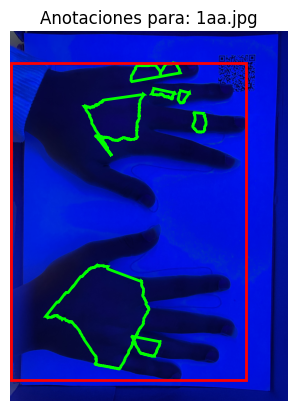

In [24]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

# Ruta al archivo XML y carpeta con imágenes
xml_path = os.path.join('/content/drive/My Drive/TFM/annotations.xml')
image_folder = os.path.join('/content/drive/My Drive/TFM/images')

# Parsear el XML
tree = ET.parse(xml_path)
root = tree.getroot()

# Obtener la segunda imagen (índice 1)
image_element = root.findall('image')[1]
image_name = image_element.attrib['name']
image_path = os.path.join(image_folder, image_name)

# Cargar la imagen
img = plt.imread(image_path)

# Crear la figura
fig, ax = plt.subplots()
ax.imshow(img)

# Dibujar polígonos
for polygon in image_element.findall('polygon'):
    points = polygon.attrib['points']
    label = polygon.attrib.get('label', 'sin etiqueta')
    coords = [tuple(map(float, p.split(','))) for p in points.split(';')]
    patch = patches.Polygon(coords, closed=True, edgecolor='lime', facecolor='none', linewidth=2, label=label)
    ax.add_patch(patch)

# Dibujar cajas (box)
for box in image_element.findall('box'):
    label = box.attrib.get('label', 'sin etiqueta')
    xtl = float(box.attrib['xtl'])
    ytl = float(box.attrib['ytl'])
    xbr = float(box.attrib['xbr'])
    ybr = float(box.attrib['ybr'])
    width = xbr - xtl
    height = ybr - ytl
    rect = patches.Rectangle((xtl, ytl), width, height, linewidth=2, edgecolor='red', facecolor='none', label=label)
    ax.add_patch(rect)

# Dibujar polilíneas (polyline)
for polyline in image_element.findall('polyline'):
    points = polyline.attrib['points']
    label = polyline.attrib.get('label', 'sin etiqueta')
    coords = [tuple(map(float, p.split(','))) for p in points.split(';')]
    x_vals, y_vals = zip(*coords)
    ax.plot(x_vals, y_vals, color='blue', linewidth=2, label=label)

# Mostrar la imagen con anotaciones
plt.axis('off')
plt.title(f"Anotaciones para: {image_name}")
plt.show()


Ya en este caso nos muestra los poligonos y la caja de las etiquetas manos y suciedad.

# Train


## Pasamos a json


In [26]:
from bs4 import BeautifulSoup
import json
import os

def cvat_xml_to_detectron2(xml_path, images_dir):
    with open(xml_path, 'r') as f:
        soup = BeautifulSoup(f.read(), 'xml')

    categories = {}
    annotations = []
    images = []
    ann_id = 0

    for i, image_tag in enumerate(soup.find_all('image')):
        file_name = image_tag['name']
        width = int(image_tag['width'])
        height = int(image_tag['height'])

        images.append({
            "file_name": file_name,
            "height": height,
            "width": width,
            "id": i
        })

        for box in image_tag.find_all(['box', 'polygon', 'polyline']):
            label = box['label']
            if label not in categories:
                categories[label] = len(categories) + 1

            if box.name == 'box':
                x = float(box['xtl'])
                y = float(box['ytl'])
                w = float(box['xbr']) - x
                h = float(box['ybr']) - y
                segmentation = []  # opcional para boxes
            else:
                points = list(map(float, box['points'].replace(';', ',').split(',')))
                segmentation = [points]
                x = min(points[::2])
                y = min(points[1::2])
                w = max(points[::2]) - x
                h = max(points[1::2]) - y

            annotations.append({
                "id": ann_id,
                "image_id": i,
                "category_id": categories[label],
                "bbox": [x, y, w, h],
                "segmentation": segmentation,
                "area": w * h,
                "iscrowd": 0
            })
            ann_id += 1

    coco_format = {
        "images": images,
        "annotations": annotations,
        "categories": [{"id": v, "name": k} for k, v in categories.items()]
    }

    return coco_format


In [28]:
# Guardamos como json
data = cvat_xml_to_detectron2("/content/drive/My Drive/TFM/annotations.xml", "carpeta/imagenes")
with open("annotations_coco.json", "w") as f:
    json.dump(data, f)

Instalamos la libreria a usar

In [29]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-6adnnmf_
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-6adnnmf_
  Resolved https://github.com/facebookresearch/detectron2.git to commit 400a49c1ec11a18dd25aea3910507bc3bcd15794
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.9 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp311

In [30]:
import torch
print(torch.__version__)
print(torch.version.cuda)


2.6.0+cu124
12.4


In [31]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 6.9 MB/s e

## Registramos el datasets


In [37]:
from detectron2.data.datasets import register_coco_instances
import os
import json
from sklearn.model_selection import train_test_split

# Create the directories if they don't exist
os.makedirs("/content/drive/My Drive/TFM/datasets/my_dataset/annotations", exist_ok=True)

# Load the data from annotations_coco.json
with open("annotations_coco.json", "r") as f:
    dataset_dicts = json.load(f)

# Split the data into train and validation sets (e.g., 80% train, 20% val)
train_dicts, val_dicts = train_test_split(dataset_dicts["images"], test_size=0.2, random_state=42)

# Create train.json
train_data = {
    "images": train_dicts,
    "annotations": [ann for ann in dataset_dicts["annotations"] if ann["image_id"] in [img["id"] for img in train_dicts]],
    "categories": dataset_dicts["categories"]
}
with open("datasets/my_dataset/annotations/train.json", "w") as f:
    json.dump(train_data, f)

# Create val.json
val_data = {
    "images": val_dicts,
    "annotations": [ann for ann in dataset_dicts["annotations"] if ann["image_id"] in [img["id"] for img in val_dicts]],
    "categories": dataset_dicts["categories"]
}
with open("datasets/my_dataset/annotations/val.json", "w") as f:
    json.dump(val_data, f)

# Eliminamos si existe metadata
MetadataCatalog.remove("suciedad_hands_train") # Remove existing metadata
MetadataCatalog.remove("suciedad_hands_val") # Remove existing metadata

# Register the datasets
register_coco_instances("suciedad_hands_train", {}, "/content/drive/My Drive/TFM/datasets/my_dataset/annotations/train.json", "datasets/my_dataset/train")
register_coco_instances("suciedad_hands_val", {}, "/content/drive/My Drive/TFM/datasets/my_dataset/annotations/val.json", "datasets/my_dataset/val")



NameError: name 'MetadataCatalog' is not defined

In [39]:
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog # Import MetadataCatalog
import os
import json
from sklearn.model_selection import train_test_split

# Create the directories if they don't exist
os.makedirs("/content/drive/My Drive/TFM/datasets/my_dataset/annotations", exist_ok=True)

# Load the data from annotations_coco.json
with open("annotations_coco.json", "r") as f:
    dataset_dicts = json.load(f)

# Split the data into train and validation sets (e.g., 80% train, 20% val)
train_dicts, val_dicts = train_test_split(dataset_dicts["images"], test_size=0.2, random_state=42)

# Create train.json
train_data = {
    "images": train_dicts,
    "annotations": [ann for ann in dataset_dicts["annotations"] if ann["image_id"] in [img["id"] for img in train_dicts]],
    "categories": dataset_dicts["categories"]
}
with open("datasets/my_dataset/annotations/train.json", "w") as f:
    json.dump(train_data, f)

# Create val.json
val_data = {
    "images": val_dicts,
    "annotations": [ann for ann in dataset_dicts["annotations"] if ann["image_id"] in [img["id"] for img in val_dicts]],
    "categories": dataset_dicts["categories"]
}
with open("datasets/my_dataset/annotations/val.json", "w") as f:
    json.dump(val_data, f)



# Register the datasets
register_coco_instances("suciedad_hands_train", {}, "/content/drive/My Drive/TFM/datasets/my_dataset/annotations/train.json", "datasets/my_dataset/train")
register_coco_instances("suciedad_hands_val", {}, "/content/drive/My Drive/TFM/datasets/my_dataset/annotations/val.json", "datasets/my_dataset/val")

In [44]:
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog # Import MetadataCatalog
import os
import json
from sklearn.model_selection import train_test_split

# Create the directories if they don't exist
os.makedirs("/content/drive/My Drive/TFM/datasets/my_dataset/annotations", exist_ok=True)

# Load the data from annotations_coco.json
with open("annotations_coco.json", "r") as f:
    dataset_dicts = json.load(f)

# Split the data into train and validation sets (e.g., 80% train, 20% val)
train_dicts, val_dicts = train_test_split(dataset_dicts["images"], test_size=0.2, random_state=42)

# Create train.json
train_data = {
    "images": train_dicts,
    "annotations": [ann for ann in dataset_dicts["annotations"] if ann["image_id"] in [img["id"] for img in train_dicts]],
    "categories": dataset_dicts["categories"]
}
with open("datasets/my_dataset/annotations/train.json", "w") as f:
    json.dump(train_data, f)

# Create val.json
val_data = {
    "images": val_dicts,
    "annotations": [ann for ann in dataset_dicts["annotations"] if ann["image_id"] in [img["id"] for img in val_dicts]],
    "categories": dataset_dicts["categories"]
}
with open("datasets/my_dataset/annotations/val.json", "w") as f:
    json.dump(val_data, f)

# Remove existing metadata before registering
# This prevents the AssertionError if the cell is run multiple times
MetadataCatalog.remove("suciedad_hands_train")
MetadataCatalog.remove("suciedad_hands_val")

# Register the datasets with the correct image_root
# Changed from 'datasets/my_dataset/train' and 'datasets/my_dataset/val' to '/content/drive/My Drive/TFM/images'
register_coco_instances("suciedad_hands_train", {}, "/content/drive/My Drive/TFM/datasets/my_dataset/annotations/train.json", "/content/drive/My Drive/TFM/images")
register_coco_instances("suciedad_hands_val", {}, "/content/drive/My Drive/TFM/datasets/my_dataset/annotations/val.json", "/content/drive/My Drive/TFM/images")

## Configuramos y entrenamos

In [45]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("suciedad_hands_train",)
cfg.DATASETS.TEST = ("suciedad_hands_val",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # suciedad y manos

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

trainer = DefaultTrainer(cfg)
trainer.train()


[04/16 10:09:50 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/worker.py", line 349, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/fetch.py", line 33, in fetch
    data.append(next(self.dataset_iter))
                ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/detectron2/data/common.py", line 296, in __iter__
    yield self.dataset[idx]
          ~~~~~~~~~~~~^^^^^
  File "/usr/local/lib/python3.11/dist-packages/detectron2/data/common.py", line 125, in __getitem__
    data = self._map_func(self._dataset[cur_idx])
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/detectron2/utils/serialize.py", line 26, in __call__
    return self._obj(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/detectron2/data/dataset_mapper.py", line 154, in __call__
    image = utils.read_image(dataset_dict["file_name"], format=self.image_format)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/detectron2/data/detection_utils.py", line 180, in read_image
    with PathManager.open(file_name, "rb") as f:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/iopath/common/file_io.py", line 1012, in open
    bret = handler._open(path, mode, buffering=buffering, **kwargs)  # type: ignore
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/iopath/common/file_io.py", line 604, in _open
    return open(  # type: ignore
           ^^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: 'datasets/my_dataset/train/36aa.jpg'
